In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
from astropy import stats
from astropy.io import fits,ascii
import sys, getopt
from photutils.isophote import Ellipse
from photutils import EllipticalAperture
from photutils.isophote import EllipseGeometry
from matplotlib.patches import Rectangle

from photutils.isophote import build_ellipse_model

#matplotlib settings for pretty plots

#matplotlib.rc('text',usetex=True)
font = {'family' : 'serif',
#        'weight' : 'bold',
        'size'   : 16,}
matplotlib.rc('font', **font)


ModuleNotFoundError: No module named 'photutils'

In [ ]:
path = '/Users/kevinm/Documents/UCSC/Year2/Quarter2/Astro257/HW3_data/'
filenames = ['n3379_sh.fits','n3379_long.fits','h22_comb.fits']

In [ ]:
shortexp = fits.open(f'{path}{filenames[0]}')
longexp = fits.open(f'{path}{filenames[1]}')
hickson = fits.open(f'{path}{filenames[2]}')

In [31]:
shortexp[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis length                                    
NAXIS2  =                 1024 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel December 2001' / FITS file originator    
DATE    = '2004-05-12T02:09:54'                                                 
IRAF-TLM= '18:09:54 (11/05/2004)'                                               
OBJECT  = 'N3379 R_s 10s'      / Name of the object observed                    
CRVAL1  =                  -20 / COLUMN ORIGIN                                  
CRVAL2  =                    0 / ROW ORIGIN                                     
CDELT1  =             2.0000

In [32]:
longexp[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis length                                    
NAXIS2  =                 1024 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel December 2001' / FITS file originator    
DATE    = '2004-05-12T02:10:08'                                                 
IRAF-TLM= '18:10:08 (11/05/2004)'                                               
OBJECT  = 'NGC3379 R_s 60s'    / Name of the object observed                    
CRVAL1  =                  -20 / COLUMN ORIGIN                                  
CRVAL2  =                    0 / ROW ORIGIN                                     
CDELT1  =             2.0000

In [45]:
print('Short Exp.',np.median(shortexp[0].data),np.mean(shortexp[0].data),np.std(shortexp[0].data),(shortexp[0].data.min(),shortexp[0].data.max()))
print('Long Exp.',np.median(longexp[0].data),np.mean(longexp[0].data),np.std(longexp[0].data),(longexp[0].data.min(),longexp[0].data.max()))


Short Exp. 133.98181 153.80171 3470.7397 (0.0, 3355829.8)
Long Exp. 766.07635 829.66376 3533.7842 (0.0, 3355728.8)


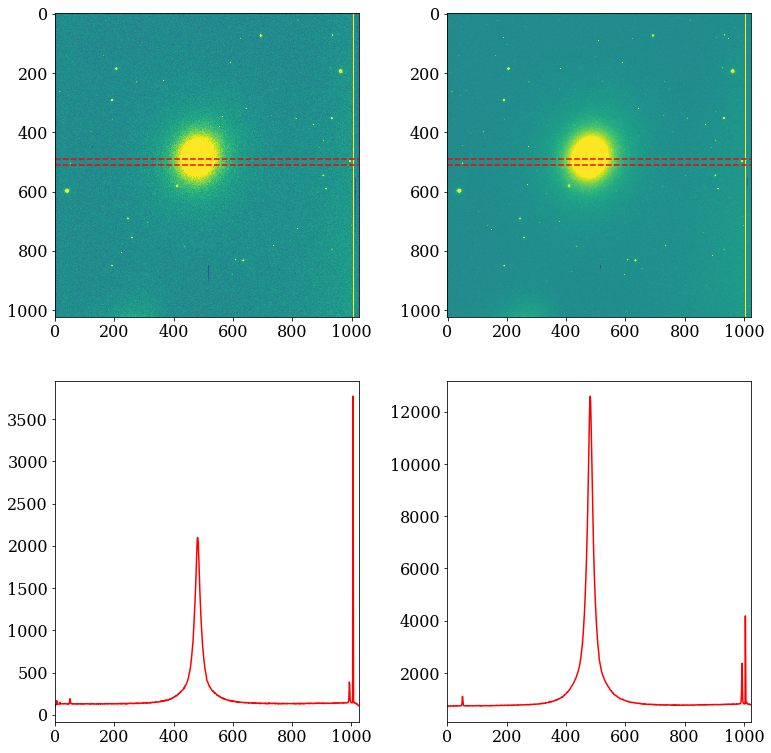

In [373]:
rows = (490,510)

fig = plt.figure(figsize=[11,11])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(shortexp[0].data,vmin=0,vmax=np.median(shortexp[0].data)*2,aspect='equal')
ax1.axhline(rows[0],c='r',ls='--')
ax1.axhline(rows[1],c='r',ls='--')
#ax1.set_title('NGC3379 Short Exposure')
ax2.imshow(longexp[0].data,vmin=0,vmax=np.median(longexp[0].data)*2,aspect='equal')
ax2.axhline(rows[0],c='r',ls='--')
ax2.axhline(rows[1],c='r',ls='--')
#ax2.set_title('NGC3379 Long Exposure')
#plt.tight_layout()
#plt.show()

#fig = plt.figure(figsize=[11,3])
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax3.plot(np.mean(shortexp[0].data[rows[0]:rows[1]],axis=0),c='r')
ax3.set_xlim(0,1024)
ax4.plot(np.mean(longexp[0].data[rows[0]:rows[1]],axis=0),c='r')
ax4.set_xlim(0,1024)
plt.tight_layout()
plt.savefig('HW3_ngc3379.png')
plt.show()



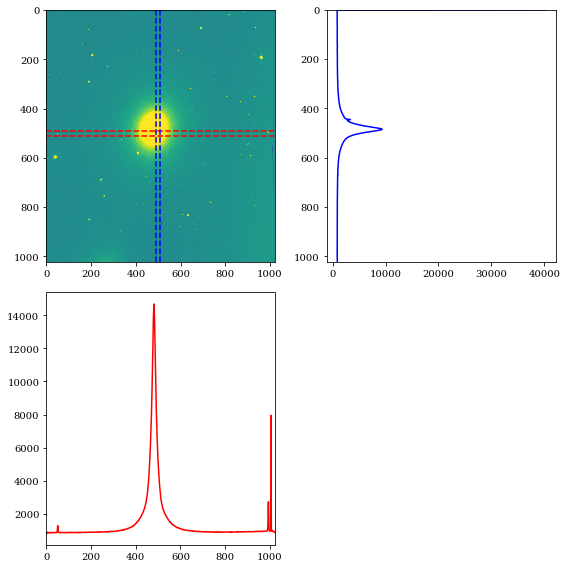

In [91]:
combined = shortexp[0].data + longexp[0].data
cols = (490,510)

fig = plt.figure(figsize=[8,8])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.imshow(combined,vmin=0,vmax=np.median(combined)*2,aspect='auto')
ax1.axhline(rows[0],c='r',ls='--')
ax1.axhline(rows[1],c='r',ls='--')
ax1.axvline(cols[0],c='b',ls='--')
ax1.axvline(cols[1],c='b',ls='--')
ax2.plot(np.mean(combined[:,cols[0]:cols[1]],axis=1),np.arange(0,1024),c='b')
ax2.set_ylim(1024,0)
ax3.plot(np.mean(combined[rows[0]:rows[1]],axis=0),c='r')
ax3.set_xlim(0,1024)
plt.tight_layout()
plt.show()



In [99]:
print(np.argsort(np.mean(combined[rows[0]:rows[1]],axis=0))[::-1],np.argsort(np.mean(combined[:,cols[0]:cols[1]],axis=1))[::-1])

[482 481 483 ...   1   4   0] [  0 485 484 ...   2   9   1]


In [124]:
x0,y0 = 482,485
sma,eps,pa = 40,0.1,-25*np.pi/180
geometry = EllipseGeometry(x0=x0, y0=y0, sma=sma, eps=eps,pa=pa)

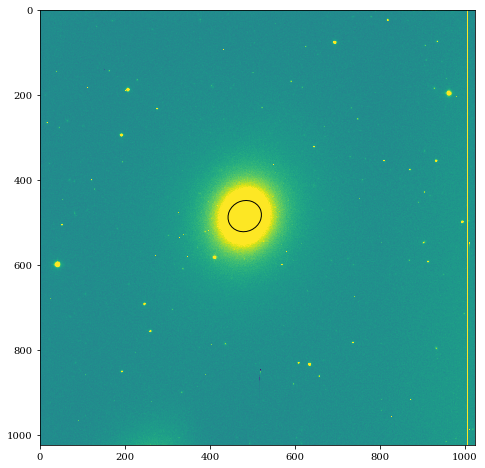

In [262]:
plt.figure(figsize=[11,8])
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,geometry.sma*(1 - geometry.eps),geometry.pa)
plt.imshow(combined,vmin=0,vmax=np.median(combined)*2,aspect='equal')
aper.plot(color='black')
plt.show()

In [192]:
ellipse = Ellipse(combined, geometry)
isolist = ellipse.fit_image(maxsma=500,sclip=3,nclip=1)

/Users/kevinm/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/kevinm/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinm/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/kevinm/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/kevinm/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [193]:
#print(isolist.to_table())


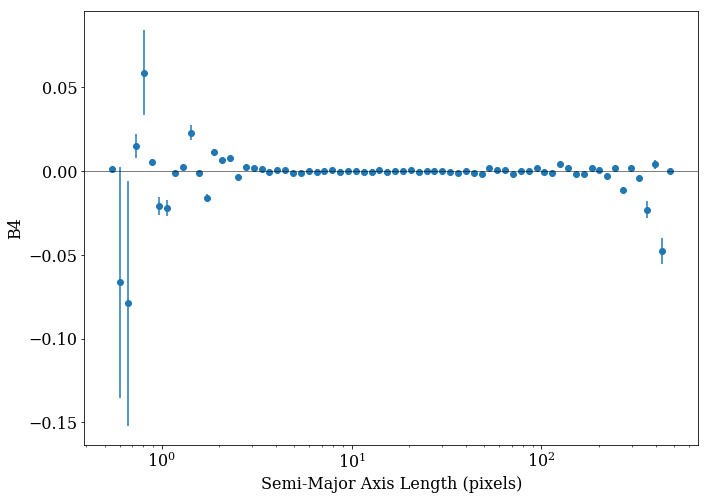

In [376]:
plt.figure(figsize=[11,8])

plt.errorbar(isolist.sma,isolist.b4,yerr=isolist.b4_err,fmt='o')
plt.axhline(0,c='k',lw=1,zorder=1000,alpha=0.5)
plt.xlabel('Semi-Major Axis Length (pixels)')
plt.ylabel('B4')
plt.gca().set_xscale('log')
plt.savefig('HW3_ngc3379_b4.png')
plt.show()

In [195]:
model_image = build_ellipse_model(combined.shape, isolist)

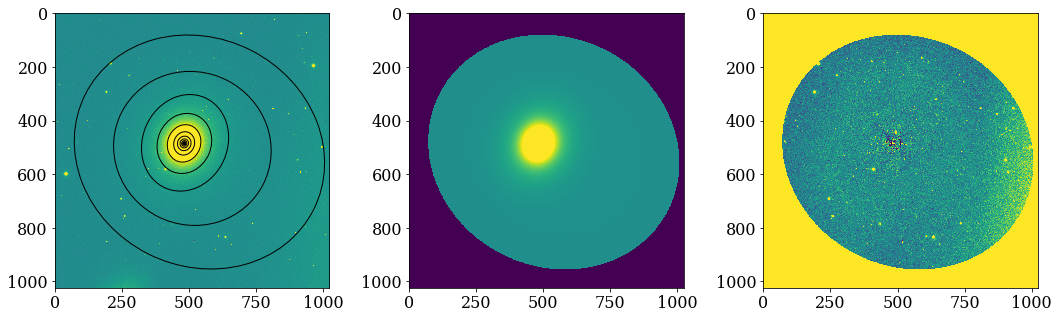

In [384]:
residual = combined - model_image

fig = plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(131)
#ax1.set_title('Data with Isophotes')
ax2 = fig.add_subplot(132)
#ax2.set_title('Model Galaxy')
ax3 = fig.add_subplot(133)
#ax3.set_title('Data $ - $ Model')

ax1.imshow(combined,vmin=0,vmax=np.median(combined)*2,aspect='equal')
for i in range(2,len(isolist),5):
    geometry_new = EllipseGeometry(x0=isolist[i].x0, y0=isolist[i].y0, sma=isolist[i].sma, eps=isolist[i].eps,pa=isolist[i].pa)
    aper_new = EllipticalAperture((geometry_new.x0, geometry_new.y0), geometry_new.sma,geometry_new.sma*(1 - geometry_new.eps),geometry_new.pa)
    aper_new.plot(color='black',ax=ax1)
ax2.imshow(model_image,vmin=0,vmax=np.median(combined)*2,aspect='equal')
ax3.imshow(residual,vmin=-np.median(residual)*5,vmax=np.median(residual)*5,aspect='equal')
plt.tight_layout()
plt.savefig('HW3_ngc3379_model.png')
plt.show()


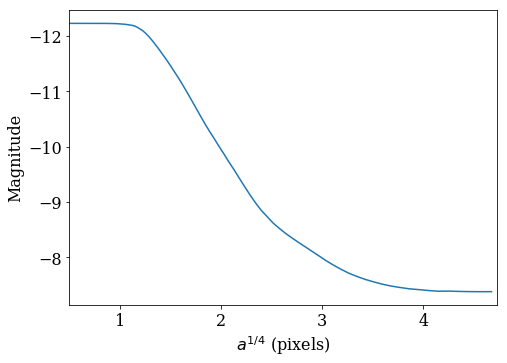

In [392]:
plt.figure(figsize=[11/3*2,8/3*2])
plt.plot(isolist.sma**0.25,-2.5*np.log10(isolist.intens))
plt.gca().invert_yaxis()
plt.xlabel('$a^{1/4}$ (pixels)')
plt.ylabel('Magnitude')
#plt.xlim(-10,500)
plt.xlim(0.5,500**0.25)
plt.tight_layout()
plt.savefig('HW3_ngc3379_profile.png')
plt.show()

In [212]:
hickson[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2048 / Axis length                                    
NAXIS2  =                 2046 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2004-05-11T02:05:30' / Date FITS file was generated                  
IRAF-TLM= '20:05:25 (10/05/2004)' / Time of last modification                   
OBJECT  = 'H22 R 600s'         / Name of the object observed                    
IRAF-MAX=           6.512316E4  /  DATA MAX                                     
IRAF-MIN=          -5.754272E0  /  DATA MIN                                     
HDR_REV = '1.010  13Jul94   

In [ ]:
cols_hickson = np.array([(1245,1255),(840,850),(780,790),(1000,1010),(1120,1130)])
rows_hickson = np.array([(1130,1140),(735,745),(1060,1070),(540,550),(595,605)])
#in x,y bottom corner, width, height
skyboxes = np.array([(200,150,50,50),(1800,1800,50,50),(250,1700,50,50),(1700,150,50,50)]) 

fig = plt.figure(figsize=[12,12])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

xmax = hickson[0].header['NAXIS1']
ymax = hickson[0].header['NAXIS2']
ax1.imshow(hickson[0].data,vmin=0,vmax=np.median(hickson[0].data)*2,aspect='auto')
colors = ['r','b','m','y','k']
for i,box in enumerate(skyboxes):
    rect = Rectangle((box[0],box[1]),box[2],box[3],linewidth=1,edgecolor='r',facecolor='none')
    ax1.add_patch(rect)
for i,rows_val in enumerate(rows_hickson):
    ax1.axhline(rows_val[0],c=colors[i],ls='--',lw=1,alpha=0.75)
    ax1.axhline(rows_val[1],c=colors[i],ls='--',lw=1,alpha=0.75)
    ax3.plot(np.mean(hickson[0].data[rows_val[0]:rows_val[1]],axis=0),c=colors[i],lw=1,alpha=0.75)
ax3.set_xlim(0,xmax)
for i,cols_val in enumerate(cols_hickson):
    ax1.axvline(cols_val[0],c=colors[i],ls='--',lw=1,alpha=0.75)
    ax1.axvline(cols_val[1],c=colors[i],ls='--',lw=1,alpha=0.75)
    ax2.plot(np.mean(hickson[0].data[:,cols_val[0]:cols_val[1]],axis=1),np.arange(0,ymax),c=colors[i],lw=1,alpha=0.75)
ax2.set_ylim(ymax,0)
plt.tight_layout()
plt.savefig('HW3_H22.png')
plt.show()



In [413]:
skyvals = np.zeros(len(skyboxes))
skyerrs = np.zeros(len(skyboxes))
for i,box in enumerate(skyboxes):
    skyvals[i] = np.median(hickson[0].data[box[0]:box[0]+box[2],box[1]:box[1]+box[3]])
    skyerrs[i] = np.std(hickson[0].data[box[0]:box[0]+box[2],box[1]:box[1]+box[3]])
#print(skyvals)
#print(skyerrs)

sky = np.mean(skyvals)
skyerr = np.std(skyvals)
print('Sky = %.1f +/- %.1f'%(sky,skyerr))
hickson_data = hickson[0].data - sky

Sky = 761.6 +/- 1.7


In [414]:
x0s = np.average(cols_hickson,axis=1)
y0s = np.average(rows_hickson,axis=1)
epss = np.array([0.3,0.6,0.3,0.3,0.3])
pas = np.array([40,-15,40,20,-10])*np.pi/180
smas = np.array([150,100,75,50,50])


geometries = []
apers = []
for i in range(len(x0s)):
    geometries.append(EllipseGeometry(x0=x0s[i], y0=y0s[i], sma=smas[i], eps=epss[i],pa=pas[i]))
    apers.append(EllipticalAperture((geometries[i].x0, geometries[i].y0), geometries[i].sma,geometries[i].sma*(1 - geometries[i].eps),geometries[i].pa))


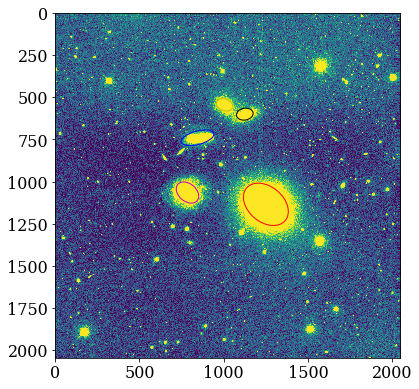

In [415]:
plt.figure(figsize=[6,6])
plt.imshow(hickson_data,vmin=-10,vmax=np.mean(hickson_data)*2,aspect='equal')
for i in range(len(apers)):
    apers[i].plot(color=colors[i])
plt.tight_layout()
plt.show()

In [416]:
ellipses_hickson = []
isolists_hickson = []
#maxsmas = np.array([500,500,100,100,500])
maxsmas = smas*3
for i in range(len(geometries)):
    print(f'Step {i+1}/{len(geometries)}')
    ellipses_hickson.append(Ellipse(hickson_data, geometries[i]))
    isolists_hickson.append(ellipses_hickson[i].fit_image(maxsma=maxsmas[i],sclip=3,nclip=3))

Step 1/5
Step 2/5
Step 3/5
Step 4/5
Step 5/5


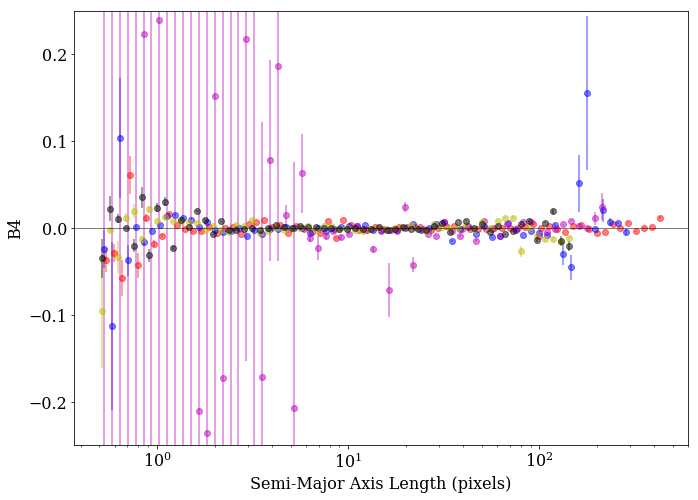

In [417]:
plt.figure(figsize=[11,8])
for i in range(len(isolists_hickson)):
    plt.errorbar(isolists_hickson[i].sma,isolists_hickson[i].b4,yerr=isolists_hickson[i].b4_err,fmt='o',c=colors[i],alpha=0.5)
plt.axhline(0,c='k',lw=1,zorder=1000,alpha=0.5)
plt.xlabel('Semi-Major Axis Length (pixels)')
plt.ylabel('B4')
plt.ylim(-0.25,0.25)
plt.gca().set_xscale('log')
plt.show()

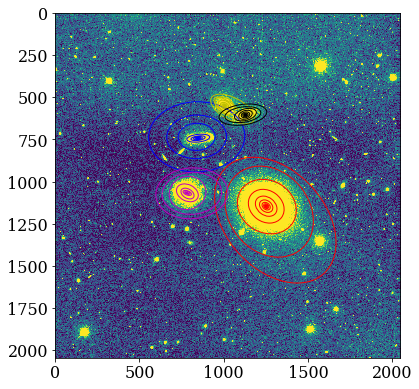

In [418]:
plt.figure(figsize=[6,6])
plt.imshow(hickson_data,vmin=-10,vmax=np.mean(hickson_data)*2,aspect='equal')
for j in range(len(isolists_hickson)):
    for i in range(2,len(isolists_hickson[j]),5):
        geometry_new_h = EllipseGeometry(x0=isolists_hickson[j][i].x0, y0=isolists_hickson[j][i].y0, sma=isolists_hickson[j][i].sma, eps=isolists_hickson[j][i].eps,pa=isolists_hickson[j][i].pa)
        aper_new_h = EllipticalAperture((geometry_new_h.x0, geometry_new_h.y0), geometry_new_h.sma,geometry_new_h.sma*(1 - geometry_new_h.eps),geometry_new_h.pa)
        aper_new_h.plot(color=colors[j])
    if i != len(isolists_hickson[j])-1:
        i = len(isolists_hickson[j])-1
        geometry_new_h = EllipseGeometry(x0=isolists_hickson[j][i].x0, y0=isolists_hickson[j][i].y0, sma=isolists_hickson[j][i].sma, eps=isolists_hickson[j][i].eps,pa=isolists_hickson[j][i].pa)
        aper_new_h = EllipticalAperture((geometry_new_h.x0, geometry_new_h.y0), geometry_new_h.sma,geometry_new_h.sma*(1 - geometry_new_h.eps),geometry_new_h.pa)
        aper_new_h.plot(color=colors[j])
plt.tight_layout()
plt.show()

In [419]:
model_images_hickson = []
for i in range(len(isolists_hickson)):
    print(f'Step {i+1}/{len(isolists_hickson)}')
    model_images_hickson.append(build_ellipse_model(hickson_data.shape, isolists_hickson[i]))

Step 1/5
Step 2/5
Step 3/5
Step 4/5
Step 5/5


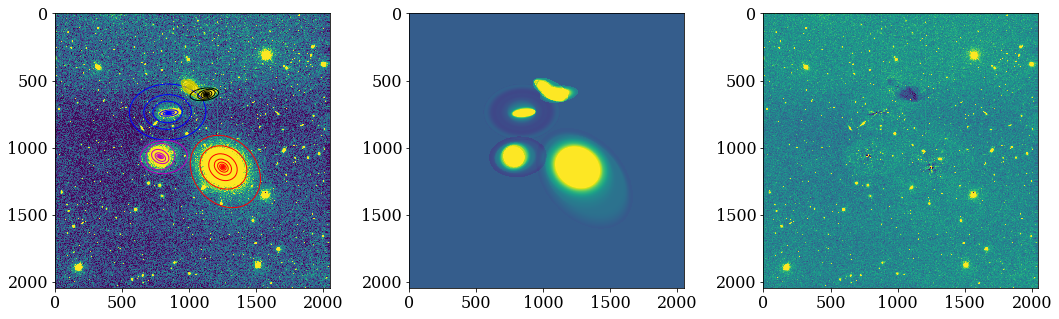

In [440]:
model_images_hickson = np.array(model_images_hickson)
residual_hickson = hickson_data - np.sum(model_images_hickson,axis=0)

fig = plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(131)
#ax1.set_title('Data with Isophotes')
ax2 = fig.add_subplot(132)
#ax2.set_title('Model Galaxy')
ax3 = fig.add_subplot(133)
#ax3.set_title('Data $ - $ Model')

ax1.imshow(hickson_data,vmin=-10,vmax=np.mean(hickson_data)*2,aspect='equal')
for j in range(len(isolists_hickson)):
    for i in range(2,len(isolists_hickson[j]),5):
        geometry_new_h = EllipseGeometry(x0=isolists_hickson[j][i].x0, y0=isolists_hickson[j][i].y0, sma=isolists_hickson[j][i].sma, eps=isolists_hickson[j][i].eps,pa=isolists_hickson[j][i].pa)
        aper_new_h = EllipticalAperture((geometry_new_h.x0, geometry_new_h.y0), geometry_new_h.sma,geometry_new_h.sma*(1 - geometry_new_h.eps),geometry_new_h.pa)
        aper_new_h.plot(color=colors[j],ax=ax1)
ax2.imshow(np.sum(model_images_hickson,axis=0),vmin=-10,vmax=np.mean(hickson_data)*2,aspect='equal')
ax3.imshow(residual_hickson,vmin=-np.mean(residual_hickson)*5,vmax=np.mean(residual_hickson)*5,aspect='equal')
plt.tight_layout()
plt.savefig('HW3_H22_model.png')
plt.show()


/Users/kevinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


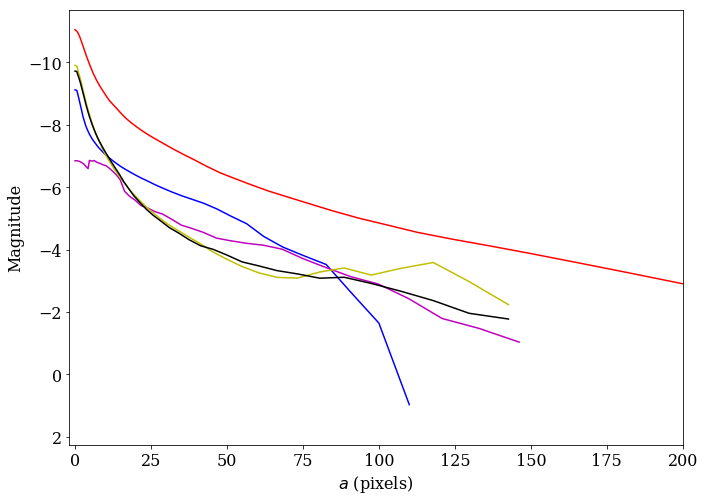

/Users/kevinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


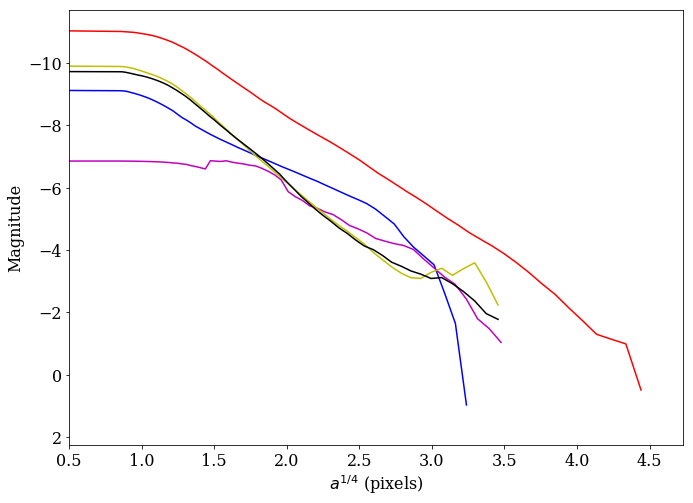

In [421]:
plt.figure(figsize=[11,8])
for i in range(len(isolists_hickson)):
    plt.plot(isolists_hickson[i].sma,-2.5*np.log10(isolists_hickson[i].intens),c=colors[i])
plt.gca().invert_yaxis()
plt.xlabel('$a$ (pixels)')
plt.ylabel('Magnitude')
plt.xlim(-2,200)
plt.show()

plt.figure(figsize=[11,8])
for i in range(len(isolists_hickson)):
    plt.plot(np.power(isolists_hickson[i].sma,0.25),-2.5*np.log10(isolists_hickson[i].intens),c=colors[i])
plt.gca().invert_yaxis()
plt.xlabel('$a^{1/4}$ (pixels)')
plt.ylabel('Magnitude')
plt.xlim(0.5,500**0.25)
plt.savefig('HW3_H22_profile.png')
plt.show()

Step 1/5


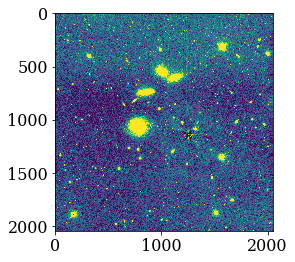

Step 2/5


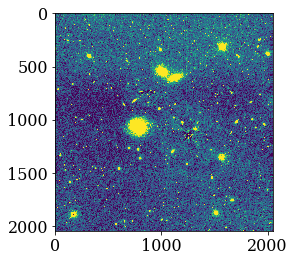

Step 3/5


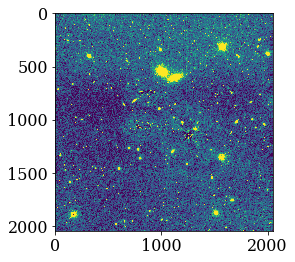

Step 4/5


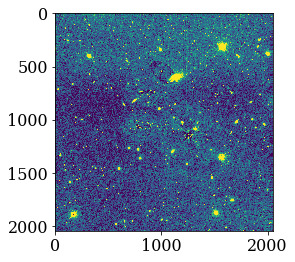

Step 5/5


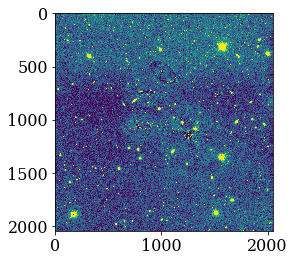

In [436]:
ellipses_hickson_proper = []
isolists_hickson_proper = []
model_images_hickson_proper = []
#maxsmas = np.array([500,500,100,100,500])
maxsmas = np.array([400,200,200,150,150])

new_data = np.copy(hickson_data)
for i in range(len(geometries)):
    print(f'Step {i+1}/{len(geometries)}')
#     if i == 1:
#         ellipses_hickson_proper.append([])
#         isolists_hickson_proper.append([])
#         model_images_hickson_proper.append([])
#         continue
    ellipses_hickson_proper.append(Ellipse(new_data, geometries[i]))
    isolists_hickson_proper.append(ellipses_hickson_proper[i].fit_image(maxsma=maxsmas[i],sclip=2,nclip=2))  
    model_images_hickson_proper.append(build_ellipse_model(new_data.shape, isolists_hickson_proper[i]))
    new_data = new_data - model_images_hickson_proper[i]
    plt.imshow(new_data,aspect='equal',vmin=-10,vmax=np.mean(hickson_data)*2)
    plt.show()

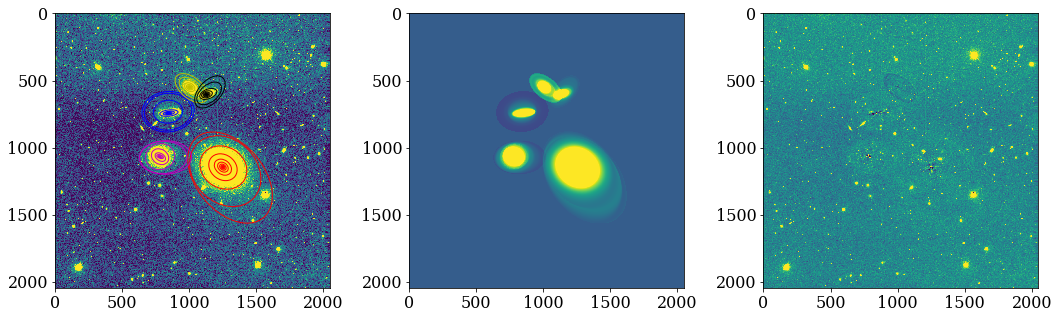

In [439]:
model_images_hickson_proper = np.array(model_images_hickson_proper)
residual_hickson_proper = hickson_data - np.sum(model_images_hickson_proper,axis=0)

fig = plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(131)
#ax1.set_title('Data with Isophotes')
ax2 = fig.add_subplot(132)
#ax2.set_title('Model Galaxy')
ax3 = fig.add_subplot(133)
#ax3.set_title('Data $ - $ Model')

ax1.imshow(hickson_data,vmin=-10,vmax=np.mean(hickson_data)*2,aspect='equal')
for j in range(len(isolists_hickson_proper)):
    for i in range(2,len(isolists_hickson_proper[j]),5):
        geometry_new_h = EllipseGeometry(x0=isolists_hickson_proper[j][i].x0, y0=isolists_hickson_proper[j][i].y0, sma=isolists_hickson_proper[j][i].sma, eps=isolists_hickson_proper[j][i].eps,pa=isolists_hickson_proper[j][i].pa)
        aper_new_h = EllipticalAperture((geometry_new_h.x0, geometry_new_h.y0), geometry_new_h.sma,geometry_new_h.sma*(1 - geometry_new_h.eps),geometry_new_h.pa)
        aper_new_h.plot(color=colors[j],ax=ax1)
    if i != len(isolists_hickson_proper[j])-1:
        i = len(isolists_hickson_proper[j])-1
        geometry_new_h = EllipseGeometry(x0=isolists_hickson_proper[j][i].x0, y0=isolists_hickson_proper[j][i].y0, sma=isolists_hickson_proper[j][i].sma, eps=isolists_hickson_proper[j][i].eps,pa=isolists_hickson_proper[j][i].pa)
        aper_new_h = EllipticalAperture((geometry_new_h.x0, geometry_new_h.y0), geometry_new_h.sma,geometry_new_h.sma*(1 - geometry_new_h.eps),geometry_new_h.pa)
        aper_new_h.plot(color=colors[j],ax=ax1)
ax2.imshow(np.sum(model_images_hickson_proper,axis=0),vmin=-10,vmax=np.mean(hickson_data)*2,aspect='equal')
ax3.imshow(residual_hickson_proper,vmin=-np.mean(residual_hickson_proper)*5,vmax=np.mean(residual_hickson_proper)*5,aspect='equal')
plt.tight_layout()
plt.savefig('HW3_H22_model_fixed.png')
plt.show()


/Users/kevinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


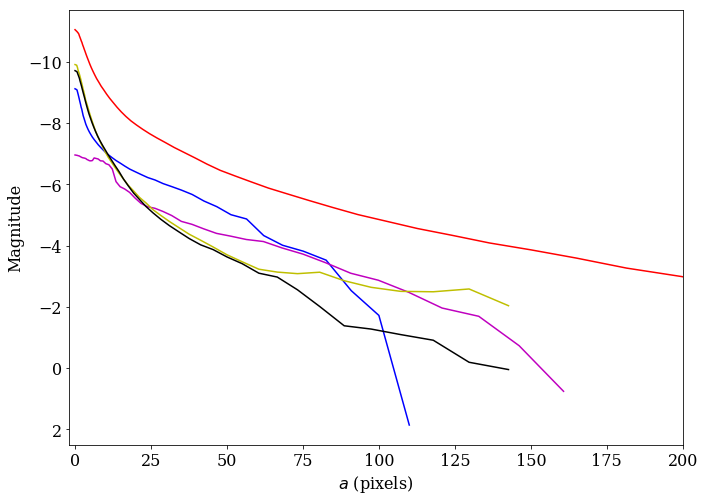

/Users/kevinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


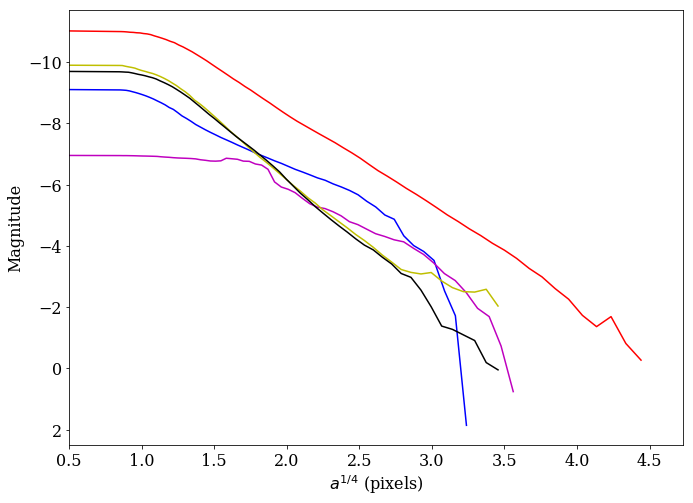

In [438]:
plt.figure(figsize=[11,8])
for i in range(len(isolists_hickson_proper)):
    plt.plot(isolists_hickson_proper[i].sma,-2.5*np.log10(isolists_hickson_proper[i].intens),c=colors[i])
plt.gca().invert_yaxis()
plt.xlabel('$a$ (pixels)')
plt.ylabel('Magnitude')
plt.xlim(-2,200)
plt.show()

plt.figure(figsize=[11,8])
for i in range(len(isolists_hickson_proper)):
    plt.plot(np.power(isolists_hickson_proper[i].sma,0.25),-2.5*np.log10(isolists_hickson_proper[i].intens),c=colors[i])
plt.gca().invert_yaxis()
plt.xlabel('$a^{1/4}$ (pixels)')
plt.ylabel('Magnitude')
plt.xlim(0.5,500**0.25)
plt.savefig('HW3_H22_profile_fixed.png')
plt.show()